In [3]:
import scipy
#import pytrends
#from pytrends.request import TrendReq
from numpy import random
import matplotlib.pyplot as plt
from scipy import optimize
import sys
import time
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.io.json import json_normalize
import json
from datetime import datetime, timedelta
from county_spending import get_county_spending, spend_county_state_map, us_state_abbrev, abbrev_us_state
from ACS_data import colname_mask
import re
import pickle
import requests
pd.set_option('display.max_columns', None)

In [40]:
# http://jeffreyfossett.com/2017/05/07/querying-usa-spending-python.html

def post_usaspending(query='agency'):
    
    query_dict = {'agency':'api/v2/disaster/agency/spending/',
                 'cfda':'/api/v2/disaster/cfda/spending/', # v long
                 'fed_acct':'/api/v2/disaster/federal_account/spending/',
                 'search_geo':'/api/v2/search/spending_by_geography'}
    q = query_dict[query]

    # initialization
    has_next_page = True
    page = 1
    output = []

    while has_next_page:
        payload =  {
              "filter": {
                  "def_codes": ["L", "M", "N", "O", "P", "U"],
                  "award_type_codes": ["02", "03", "04", "05", "07", "08", "10", "06", "09", "11", "A", "B", "C", "D", "IDV_A", "IDV_B", "IDV_B_A", "IDV_B_B", "IDV_B_C", "IDV_C", "IDV_D", "IDV_E"]
              },
              "pagination": {
                  "limit": 10,
                  "page": page,
                  "sort": "award_count",
                  "order": "desc"
              },
              "spending_type": "total"
          }

        r = requests.post('https://api.usaspending.gov'+q, json=payload)
        rjson = r.json()
        print(rjson)
        output+= rjson['results']
        has_next_page = rjson['page_metadata']['hasNext']
        page+=1
        print(r.status_code, page)
    return output

In [23]:
response = post_usaspending()
response

200 2
200 3
200 4
200 5


[{'id': 1475,
  'code': '418',
  'description': 'National Endowment for the Humanities',
  'children': [],
  'award_count': None,
  'obligation': 67760506.0,
  'outlay': 46469007.08,
  'total_budgetary_resources': 75000000.0},
 {'id': 1474,
  'code': '474',
  'description': 'Institute of Museum and Library Services',
  'children': [],
  'award_count': None,
  'obligation': 45869406.4,
  'outlay': 11809588.74,
  'total_budgetary_resources': 50000000.0},
 {'id': 1412,
  'code': '096',
  'description': 'Corps of Engineers - Civil Works',
  'children': [],
  'award_count': None,
  'obligation': 32340962.4,
  'outlay': 25404182.25,
  'total_budgetary_resources': 70000000.0},
 {'id': 1173,
  'code': '097',
  'description': 'Department of Defense',
  'children': [],
  'award_count': None,
  'obligation': 8088671963.94,
  'outlay': 5392158825.19,
  'total_budgetary_resources': 9491174000.0},
 {'id': None,
  'code': '373',
  'description': 'Institute of American Indian and Alaska Native Culture

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 <a list of 38 Text xticklabel objects>)

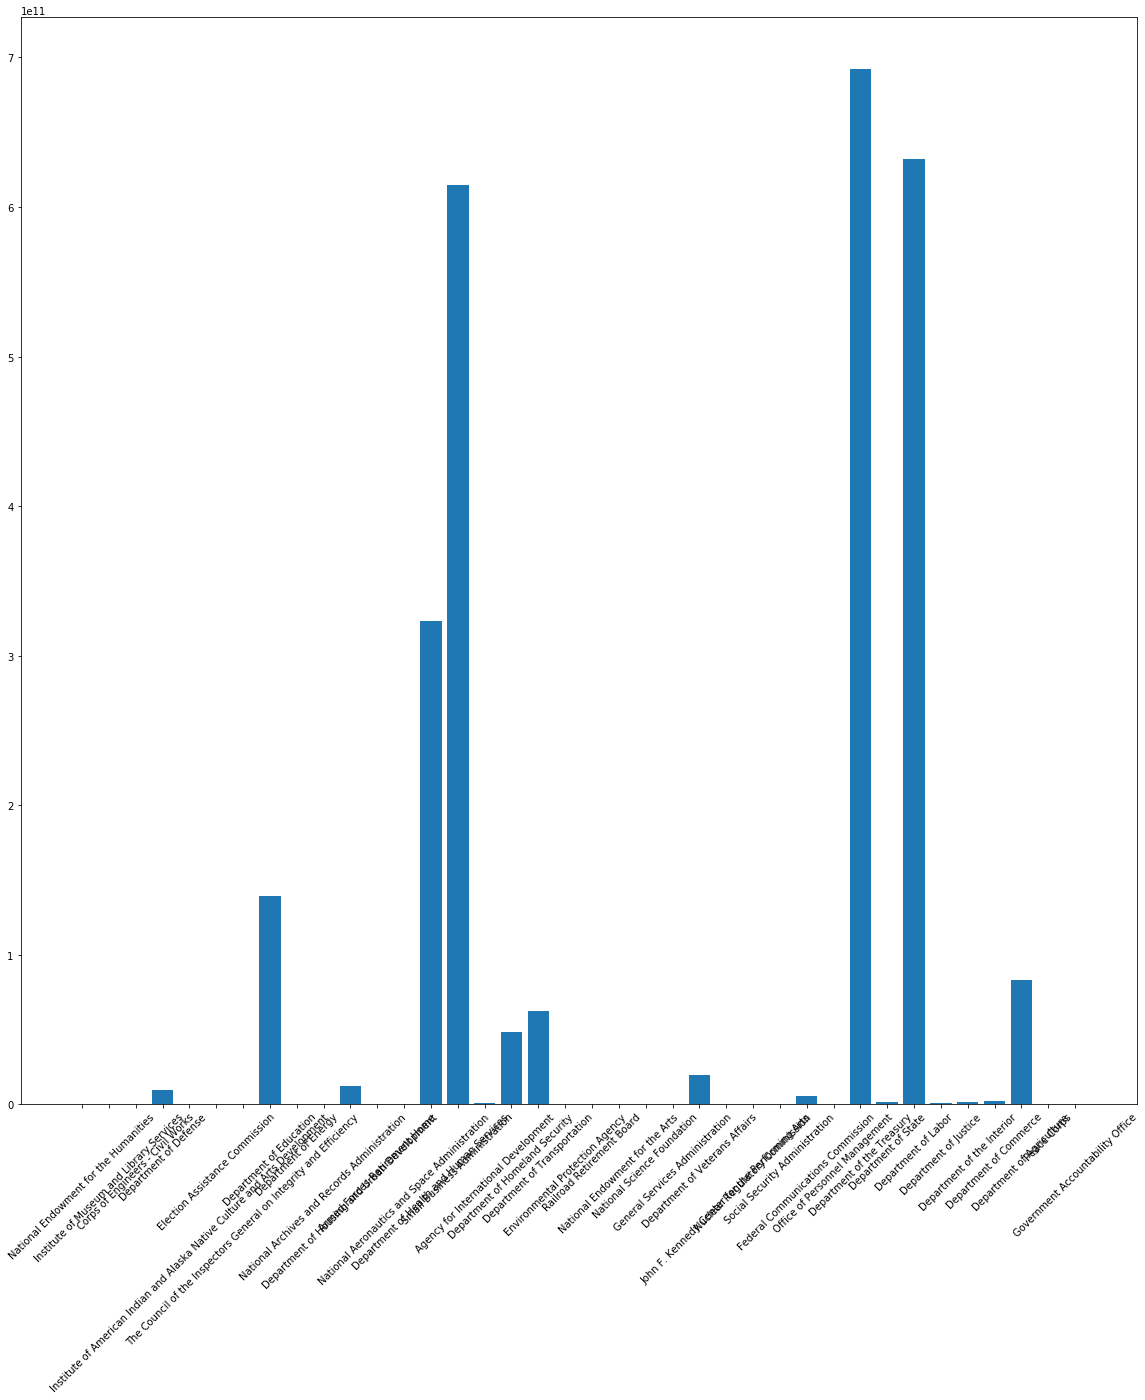

In [50]:
labels = [i['description'] for i in response]
awards = [i['total_budgetary_resources'] for i in response]

plt.figure(figsize=(20,20))
plt.bar(labels,awards)
plt.xticks(rotation=45)


In [39]:
post_usaspending('fed_acct')

{'results': [{'id': 6368, 'code': '027-1912', 'description': 'Secure and Trusted Communications Networks Reimbursement Program, Federal Communications Commission', 'award_count': None, 'obligation': 125000.0, 'outlay': 0.0, 'total_budgetary_resources': 1900000000.0, 'children': [{'id': 80449, 'code': '027-X-1912-000', 'description': 'Secure and Trusted Communications Networks Reimbursement Program, Federal Communications Commission', 'award_count': None, 'obligation': 125000.0, 'outlay': 0.0, 'total_budgetary_resources': 1900000000.0}]}, {'id': 6357, 'code': '020-0158', 'description': 'Pandemic Relief for Aviation Workers, Departmental Offices, Treasury', 'award_count': None, 'obligation': 12252740653.0, 'outlay': 6126370327.0, 'total_budgetary_resources': 16000000000.0, 'children': [{'id': 80426, 'code': '020-X-0158-000', 'description': 'Pandemic Relief for Aviation Workers, Departmental Offices, Treasury', 'award_count': None, 'obligation': 12252740653.0, 'outlay': 6126370327.0, 'tot

[{'id': 6368,
  'code': '027-1912',
  'description': 'Secure and Trusted Communications Networks Reimbursement Program, Federal Communications Commission',
  'award_count': None,
  'obligation': 125000.0,
  'outlay': 0.0,
  'total_budgetary_resources': 1900000000.0,
  'children': [{'id': 80449,
    'code': '027-X-1912-000',
    'description': 'Secure and Trusted Communications Networks Reimbursement Program, Federal Communications Commission',
    'award_count': None,
    'obligation': 125000.0,
    'outlay': 0.0,
    'total_budgetary_resources': 1900000000.0}]},
 {'id': 6357,
  'code': '020-0158',
  'description': 'Pandemic Relief for Aviation Workers, Departmental Offices, Treasury',
  'award_count': None,
  'obligation': 12252740653.0,
  'outlay': 6126370327.0,
  'total_budgetary_resources': 16000000000.0,
  'children': [{'id': 80426,
    'code': '020-X-0158-000',
    'description': 'Pandemic Relief for Aviation Workers, Departmental Offices, Treasury',
    'award_count': None,
    